In [35]:
library(tidyverse)
library(scales)
library(tidymodels)

In [97]:
tennisdata <- read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")
cn = make.names(names(tennisdata))
colnames(tennisdata)<- cn
tennisdata2 <- select(tennisdata, Best.Rank, Prize.Money) %>%
mutate(Best.Rank = parse_number(gsub("\\s*\\([^\\)]+\\)","",as.character(Best.Rank))), Prize.Money = parse_number(Prize.Money))%>%
na.omit()

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



In [98]:
tennisdata3 <- mutate(tennisdata2, Best.Elo.Rank = scale(Best.Rank, center = TRUE), 
        Prize.Money = scale(Prize.Money, center = TRUE))

In [99]:
tennis_split <- initial_split(tennisdata2, prop = 0.75, strata = Prize.Money)
tennis_training <- training(tennis_split)
tennis_testing <- testing(tennis_split)

tennis_training


Best.Rank,Prize.Money
<dbl>,<dbl>
44,3261567
17,6091971
213,278709
229,59123
253,122734
104,74927
17,1893476
4,10507693
143,303458


In [113]:
tennis_summary <- tennis_training %>%
summarise(Average_Rank = mean(Best.Rank, na.rm=TRUE), 
          Average_money = mean(Prize.Money, na.rm=TRUE),
          Total_Rows = n())
tennis_summary

Average_Rank,Average_money,Total_Rows
<dbl>,<dbl>,<int>
149.146,3208170,315


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



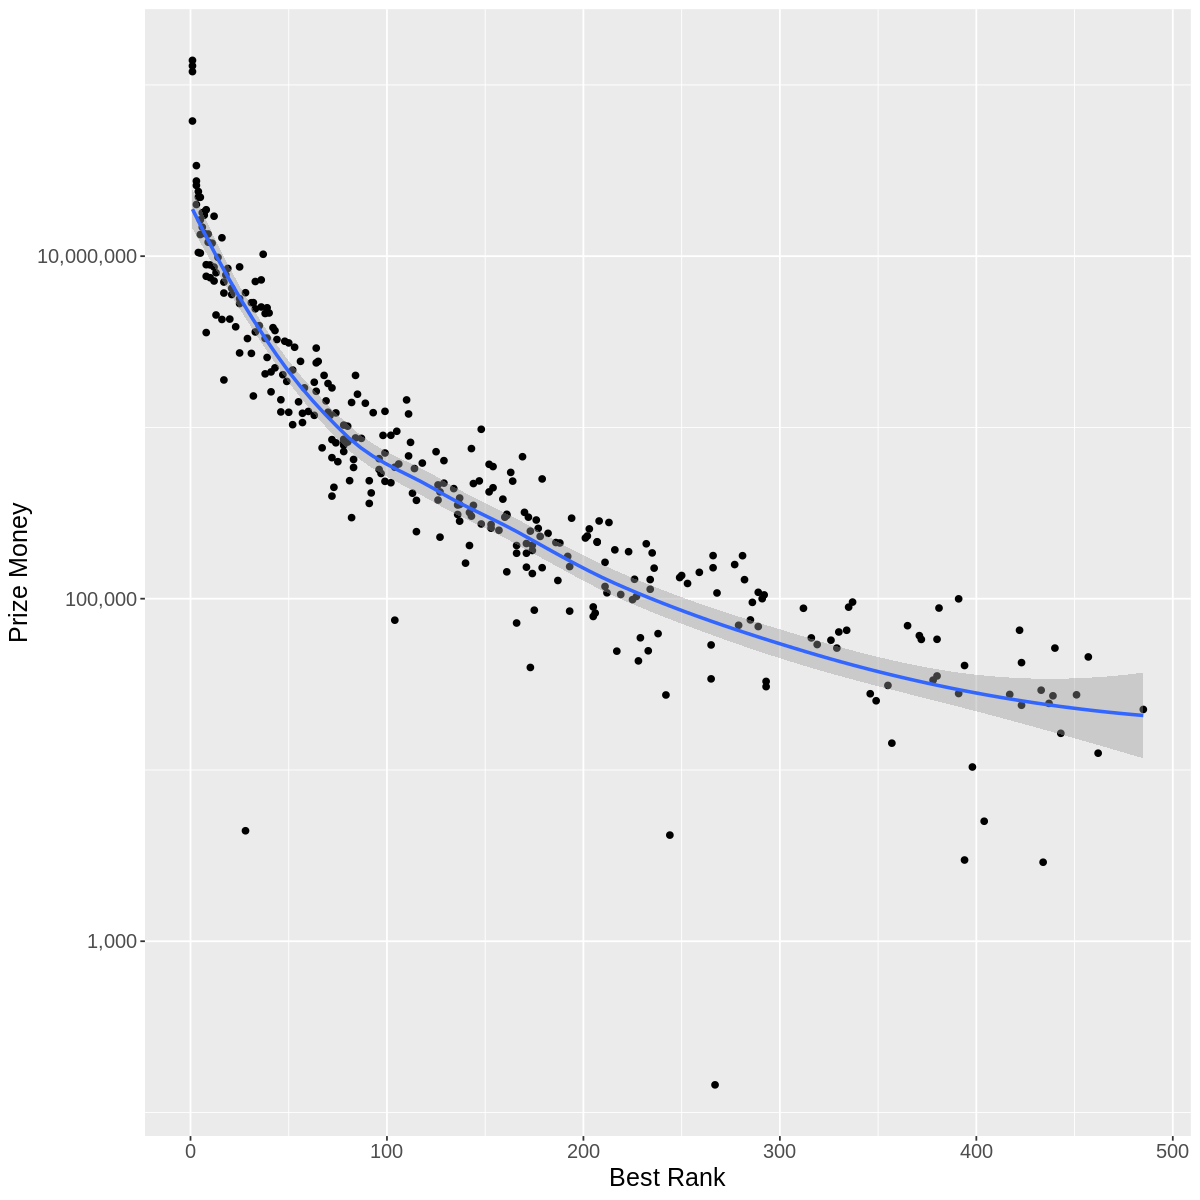

In [95]:
tennisplot <- tennis_training %>%
ggplot(aes(x = Best.Rank, y = Prize.Money)) +
geom_point() +
geom_smooth() +
labs(x = "Best Rank", y = "Prize Money") +
theme(text = element_text(size = 15)) +
scale_y_log10(labels = label_comma())
options(repr.plot.width = 10, repr.plot.height = 10)

tennisplot 

This is a test to update the repo